In [1]:
import sys
sys.path.append('../../')
import cresthh
from cresthh import anuga
from osgeo import gdal
from glob import glob
from affine import Affine
import geopandas as gpd
from pyproj import Proj, CRS, transform
import os
import json

%matplotlib inline

# Allow inline jshtml animations
from matplotlib import rc
rc('animation', html='jshtml')

In [2]:
domain= anuga.create_domain_from_file('/home/ZhiLi/mesher/examples/Houston/stream_dem/DEM_10m.mesh')

[]


In [3]:
topography_file = '/hydros/ZhiLi/demHouston033s_NAm83.tif'

Figure files for each frame will be stored in _plot


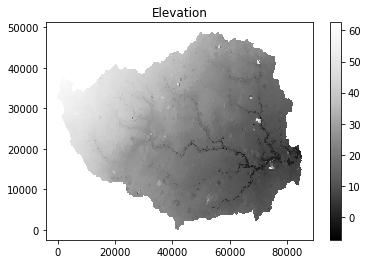

In [4]:
start= '20170825000000'
end= '20170825010000'
domain.set_proj("+proj=utm +zone=15, +north +ellps=WGS84 +datum=WGS84 +units=m +no_defs")
domain.set_quantity('elevation', filename=topography_file, location='centroids') # Use function for elevation
domain.set_quantity('friction', filename='/home/ZhiLi/CRESTHH/data/Texas_friction/manningn.tif', location='centroids') 
domain.set_quantity('stage', expression='elevation', location='centroids')         # Dry Bed 
domain.set_quantity('SM', 0.01, location='centroids')
domain.set_quantity('Ksat', filename='/hydros/MengyuChen/Summer/New/CREST_parameters/crest_param/ksat.tif', location='centroids')
domain.set_quantity('WM', filename='/hydros/MengyuChen/Summer/New/CREST_parameters/crest_param/wm_10m.tif', location='centroids')
domain.set_quantity('B', filename='/hydros/MengyuChen/Summer/New/CREST_parameters/crest_param/b_10m.tif', location='centroids')
domain.set_quantity('IM', filename='/hydros/MengyuChen/Summer/New/CREST_parameters/crest_param/im.tif', location='centroids')
domain.set_quantity('KE', 0.89, location='centroids')
domain.set_coupled(True)

domain.set_evap_dir('/home/ZhiLi/CRESTHH/data/evap', pattern='cov_et17%m%d.asc.tif', freq='1D')
# domain.set_precip_dir('/home/ZhiLi/CRESTHH/data/precip',pattern='nimerg%Y%m%dS%H%M%S.tif', freq='1H')
domain.set_precip_dir('/home/ZhiLi/CRESTHH/data/synthetic_rainfall',pattern='PrecipRate_00.00_%Y%m%d-%H%M00.grib2-var0-z0.tif', freq='2M')
domain.set_timestamp(start, format='%Y%m%d%H%M%S')
domain.set_time_interval('2M')
domain.set_name('coupled_10m_modified_mesh')
total_seconds= (pd.to_datetime(end) - pd.to_datetime(start)).total_seconds()
dplotter = anuga.Domain_plotter(domain)  
plt.tripcolor(dplotter.triang, 
              facecolors = dplotter.elev, 
              cmap='Greys_r')
plt.colorbar();
plt.title("Elevation");

In [5]:
Br = anuga.Reflective_boundary(domain)
Bt = anuga.Transmissive_boundary(domain)
Bi = anuga.Dirichlet_boundary([0, 0, 0]) 

domain.set_boundary({'bottom':   Bt,
                     'interior': Br,
                     'exterior': Bi})

In [6]:
# Rain = anuga.Quantity(domain, name='Rain')
# ET= anuga.Quantity(domain, name='ET')
# forcing_op= anuga.Rate_operator(domain, rate=Rain+ET)
# rain_op = anuga.Rate_operator(domain, rate = Rain)
# et_op = anuga.Rate_operator(domain, rate= Evap)
# Rain= anuga.Rate_operator(domain, rate=lambda t: 5 if t<5 else 10)
for i,t in enumerate(domain.evolve(yieldstep=120, duration=3600*24)):
#     current_rain_file = sorted(glob(external_dir+'/*.tif'))[i]
#     print(current_rain_file)
#     Rain.set_values_from_utm_grid_file(current_rain_file, location='centroids')
#     ET.set_values_from_utm_grid_file(current_rain_file, location='centroids')
#     dplotter.plot_depth_frame()
    dplotter.save_depth_frame(vmin=0, vmax=30)
#     domain.print_operator_timestepping_statistics()
    domain.print_timestepping_statistics(track_speeds=False)
#     domain.report_water_volume_statistics()

    stage = domain.get_quantity('stage')
    elev  = domain.get_quantity('elevation')
    height = stage - elev
    print 'integral = ', height.get_integral()    
# Read in the png files stored during the evolve loop
dplotter.make_depth_animation()

AssertionError: Quantity depth is requested to be stored but it does not exist in domain.quantities

In [9]:
domain.quantities.keys()

['xvelocity',
 'B',
 'elevation',
 'excess_rain',
 'KE',
 'ET',
 'friction',
 'height',
 'P',
 'WM',
 'IM',
 'Ksat',
 'SM',
 'xmomentum',
 'y',
 'x',
 'yvelocity',
 'ymomentum',
 'stage']